# Proyek Analisis Data: Nama dataset
- Nama: Elfina
- Email: fina.fnoor@gmail.com
- Id Dicoding: Elfina

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda / rental bike dalam berbagai musim?
- Bagaimana performa penyewaan sepeda / rental bike berdasarkan hari?

## Menyaipkan semua library yang dibuthkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving day.csv to day.csv
Saving hour.csv to hour.csv


In [ ]:
day_df = pd.read_csv('day.csv')
hour_df = pd.read_csv('hour.csv')
day_df.head()
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
day_df.info()
hour_df.info()
day_df.describe()
hour_df.describe()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

### Cleaning Data

In [ ]:
#Memperbaiki tipe data

datetime_columns = ["dteday"]
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

datetime_columns = ["dteday"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# Menghitung rata-rata rental bike per season
season_counts = hour_df.groupby('season')['cnt'].mean()

print(season_counts)


season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: cnt, dtype: float64


In [ ]:

# Mengambil hari dalam seminggu
day_df['day_of_week'] = day_df['dteday'].dt.day_name()

# Menghitung rata-rata total rental
rentals_by_day = day_df.groupby('day_of_week')['cnt'].mean()

print(rentals_by_day)



day_of_week
Friday       4690.288462
Monday       4338.123810
Saturday     4550.542857
Sunday       4228.828571
Thursday     4667.259615
Tuesday      4510.663462
Wednesday    4548.538462
Name: cnt, dtype: float64


## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana performa penyewaan sepeda / rental bike dalam berbagai musim?

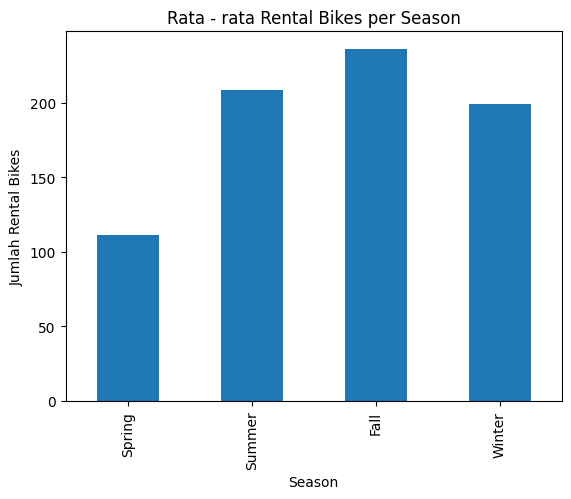

In [ ]:
season_counts.plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Jumlah Rental Bikes')
plt.title('Rata - rata Rental Bikes per Season')
plt.xticks(range(4), ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()

### Pertanyaan 2:
Bagaimana performa penyewaan sepeda / rental bike berdasarkan hari?

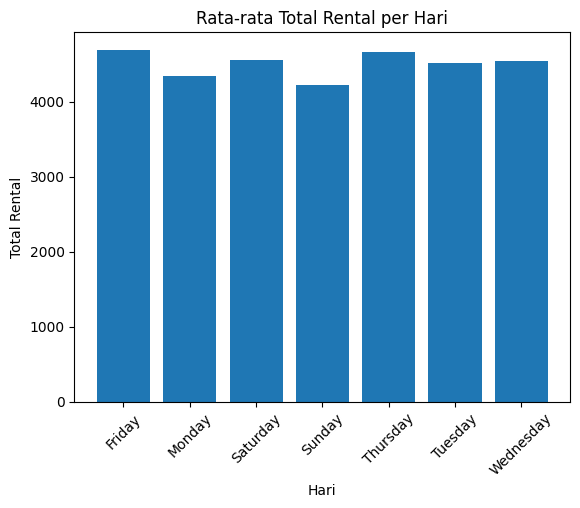

In [ ]:
plt.bar(rentals_by_day.index, rentals_by_day)
plt.xlabel('Hari')
plt.ylabel('Total Rental')
plt.title('Rata-rata Total Rental per Hari')
plt.xticks(rotation=45)
plt.show()


In [ ]:
day_df.to_csv("hari.csv", index=False)
hour_df.to_csv("jam.csv", index=False)

## Conclusion

- Bagaimana performa penyewaan sepeda / rental bike dalam berbagai musim?

  Berdasarkan hasil analisis data yang telah divisualisasikan, musim gugur / fall season adalah musim dimana rental bike paling banyak dilakukan, diikuti musim panas/summer dan musim dingin/winter. Rental bike paling sedikit pada musim semi/spring.


- Bagaimana performa penyewaan sepeda / rental bike berdasarkan hari?

  Berdasarkan hasil analisis data, rental bike paling banyak dilakukan pada hari jum'at/friday dan kamis/thursday. Rental bike paling sedikit terjadi pada hari minggu/sunday.